# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib
import seaborn as sns

# DATA LOAD: LOAD BANGALORE HOME PRICES DATASET INTO A DATAFRAME

In [2]:
df1 = pd.read_csv("Bangalore_Prediction_dataset.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

# EXPLORATORY DATA ANALYSIS

Value Count of Each Feature

In [4]:
def value_count(df1):
    for var in df1.columns:
        print(df1[var].value_counts())
        print("--------------------------------")

In [5]:
value_count(df1)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
--------------------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
-----------------------------

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


We have only 3 numerical features - bath, balcony and price

6 categorical features - area type, availability, size, society, and total_sqft

Target Feature =======>>>>>> price >>>>>>

Price in lakh

In [9]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


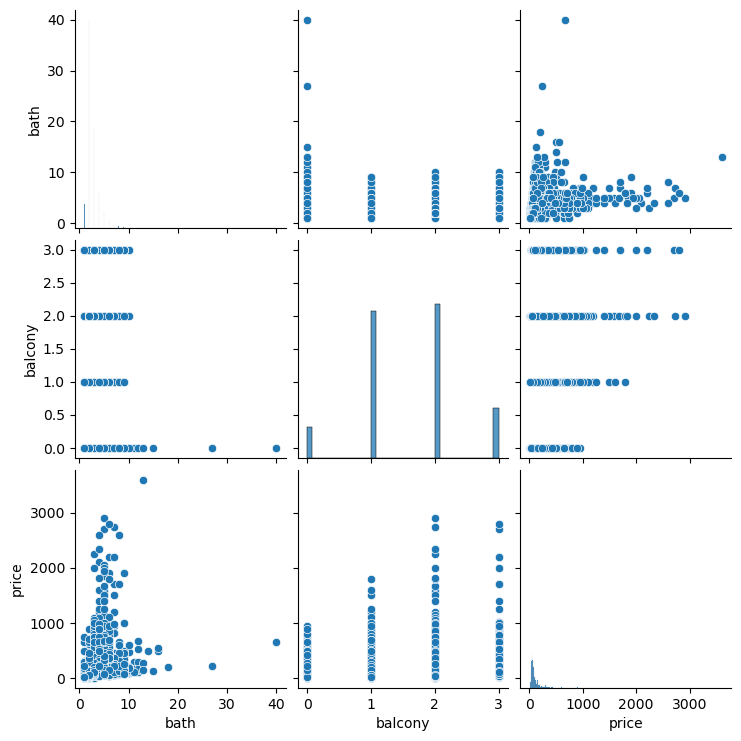

In [10]:
sns.pairplot(df1)

CORRELATION

In [11]:
numeric_features=df1.select_dtypes(include=[np.number])
numeric_features.columns

Index(['bath', 'balcony', 'price'], dtype='object')

In [12]:
categorical_features=df1.select_dtypes(include=[np.object])
categorical_features.columns

C:\Users\user\AppData\Local\Temp\ipykernel_4820\3383281354.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features=df1.select_dtypes(include=[np.object])


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [13]:
correlation=numeric_features.corr()
print(correlation['price'].sort_values(ascending=False),'\n')

price      1.000000
bath       0.456345
balcony    0.120355
Name: price, dtype: float64 



Text(0.5, 1, 'Correlation of Numeric Features with the Price')

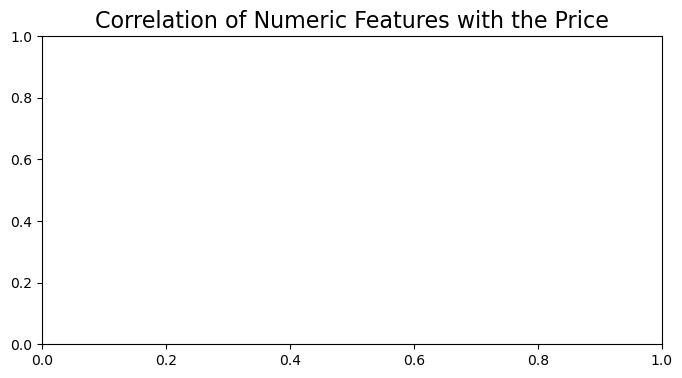

In [14]:
f,ax=plt.subplots(figsize=(8,4))
plt.title("Correlation of Numeric Features with the Price",y=1,size=16)

<AxesSubplot:>

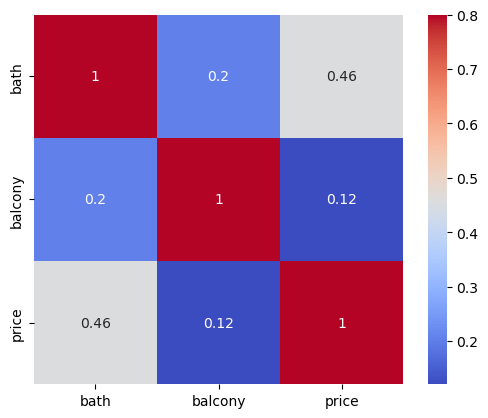

In [15]:
sns.heatmap(correlation,square=True,cmap="coolwarm",annot=True,vmax=0.8)

# PREPARE THE DATA FOR THE MACHINE LEARNING MODEL

# DATA CLEANING: HANDLING NA VALUES

Finding how much of missing values are there

In [16]:
missing=df1.isnull().sum()

Percentage of the missing value

In [17]:
df1.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

Society has 41.3% of the missing values and Balcony has 4.57% of the missing values

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


<AxesSubplot:>

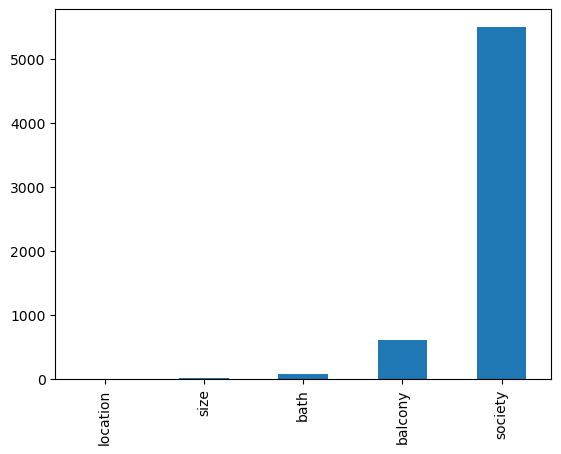

In [18]:
print(missing)
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

Visualize missing value using heatmap to get idea where is the value missing

<AxesSubplot:>

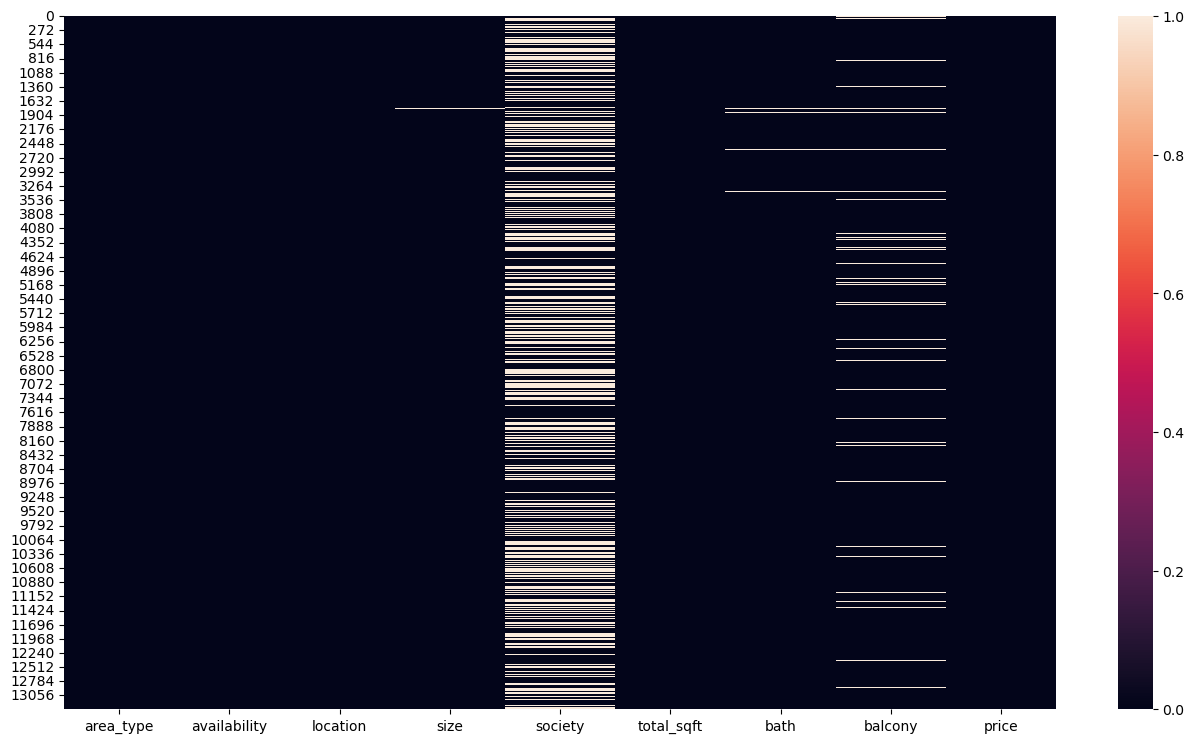

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(df1.isnull())

Dropping the features that are not required to build our model as here 41.3% of missing values exists for society we remove the feature society here

In [20]:
df2 = df1.drop(['society'],axis='columns')
df2.shape

(13320, 8)

Fill mean value in --------> balcony feature because it contain 4.5% missing value

In [21]:
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

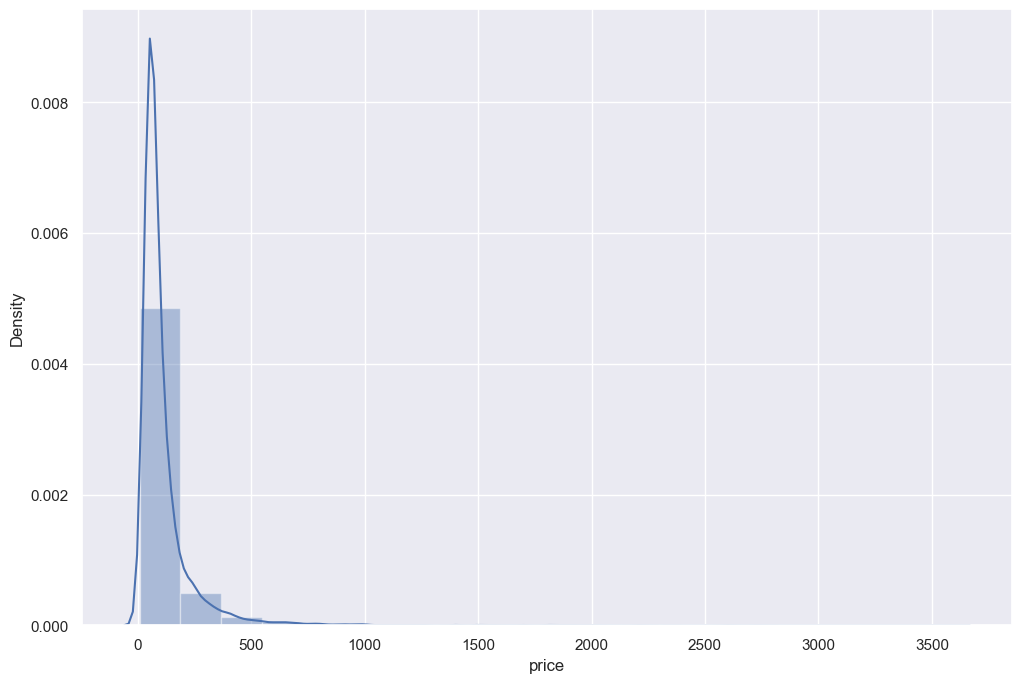

In [22]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(df1['price'],kde=True,bins=20)

kde covers the distribution boundary

In [23]:
df1['price'].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

Mean is greater than the Median(50th Percentile)

Drop the NA value rows from the df2 as the percentage value of missing is very less

In [24]:
df3 = df2.dropna()

In [25]:
df3.shape

(13246, 8)

In [26]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

So all the NULL values have been removed

# FEATURE ENGINEERING

To show all the columns and rows

In [27]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

Add new feature(integer) for bhk(Bedroom Hall Kitchen)

In [28]:
df3['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

Size feature shows the number of rooms present

In size feature we assume that 2 BHK = 2 Bedroom == 2 RK, so it takes only the numerical and removes the suffix text

In [29]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\user\AppData\Local\Temp\ipykernel_4820\2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [30]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


Converting 'total_sqft' categorical feature in numeric

In [31]:
df3['total_sqft'].value_counts()

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225                  48


Here we observe that 'total_sqft' contain string value in different format---> float, int like value 1689.28,817

Range value: 540 - 740

number and string: 142.84Sq. Meter, 117Sq. Yards, 1Grounds

Converting 'total_sqft' into the numeric values by splitting it

In [32]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [33]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]

Reset the index of dataframe

In [34]:
df4 = df3.reset_index(drop=True)

Don't add index column in the df

In [36]:
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [37]:
df4.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

No NULL value exists...

In [38]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13246 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   availability  13246 non-null  object 
 2   location      13246 non-null  object 
 3   size          13246 non-null  object 
 4   total_sqft    13246 non-null  object 
 5   bath          13246 non-null  float64
 6   balcony       13246 non-null  float64
 7   price         13246 non-null  float64
 8   bhk           13246 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 931.5+ KB


Add New Feature called Price Per Square Feet

In [39]:
df4['total_sqft']

0                     1056
1                     2600
2                     1440
3                     1521
4                     1200
5                     1170
6                     2732
7                     3300
8                     1310
9                     1020
10                    1800
11                    2785
12                    1000
13                    1100
14                    2250
15                    1175
16                    1180
17                    1540
18                    2770
19                    1100
20                     600
21                    1755
22                    2800
23                    1767
24                     510
25                    1250
26                     660
27                    1610
28                    1151
29                    1025
30             2100 - 2850
31                    1075
32                    1760
33                    1693
34                    1925
35                     700
36                    1070
3

In [55]:
df5 = pd.read_csv("bhp.csv")
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


Examine Locations which is a Categorical variable.

 We need to apply Dimensionality Reduction Technique here to reduce number of columns

In [45]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bellandur     

In [46]:
location_stats.values.sum()

13246

In [47]:
len(location_stats[location_stats>10])

241

In [48]:
len(location_stats)

1293

# DIMENSIONALITY REDUCTION

Any column having less than 10 data points will be tagged as "other" location. This way the number of categories can be reduced by huge amount. It will help us with having fewer dummy columns.

In [49]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [50]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

# OUTLIER REMOVAL USING LOGIC 

For Q-Q plots

In [51]:
import scipy.stats as stats

Normally Square Feet per Bedroom is 300( i.e, 2 bhk apartment is minimum 600 sqft). Eg: 400 sqft apartment with 2 bhk seems suspicious and can be treated as an outlier. We will remove such outliers by keeping minimum threshold per bhk to be 300 sqft.

In [52]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
 
    # define figure size
    plt.figure(figsize=(16, 4))
 
    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
 
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
 
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
 
    plt.show()

******* bath *******


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


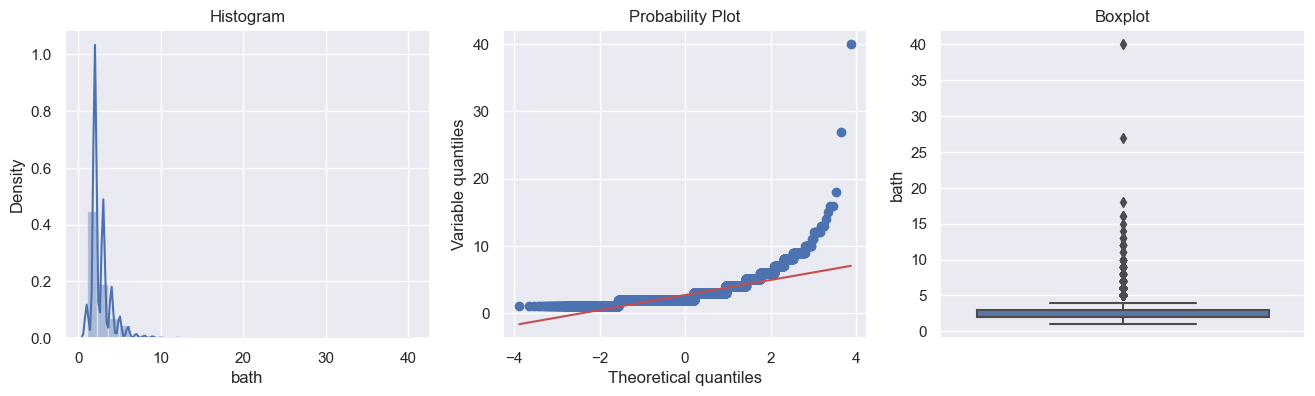

******* balcony *******


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


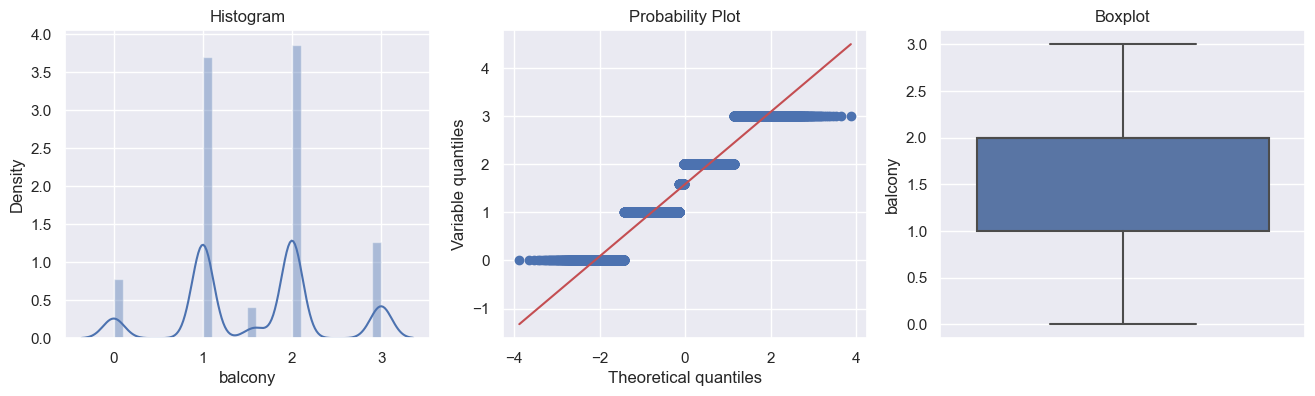

******* total_sqft *******


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '2100 - 2850'

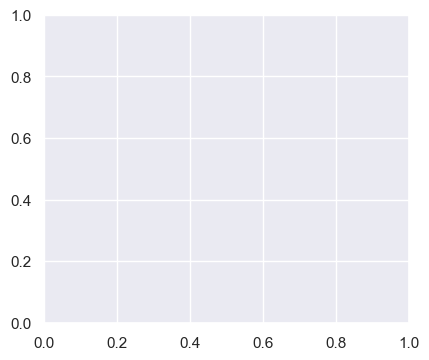

In [53]:
num_var = ["bath","balcony","total_sqft","bhk","price"]
for var in num_var:
    print("******* {} *******".format(var))
    diagnostic_plots(df5, var)

Here we observe outlier using histogram,, qq plot and boxplot

Here we consider 1 BHK requires min 300 sqft

In [56]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
57,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
67,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
69,Double Road,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [57]:
df5.shape

(13200, 7)

In [58]:
df5.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Here we ind that minimum price per sqft is Rs. 267 whereas maximum is Rs. 176470. This shows a wide variation in property prices. We should ignore outliers per locartion using mean and one standard devitaion.

In [59]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10066, 7)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

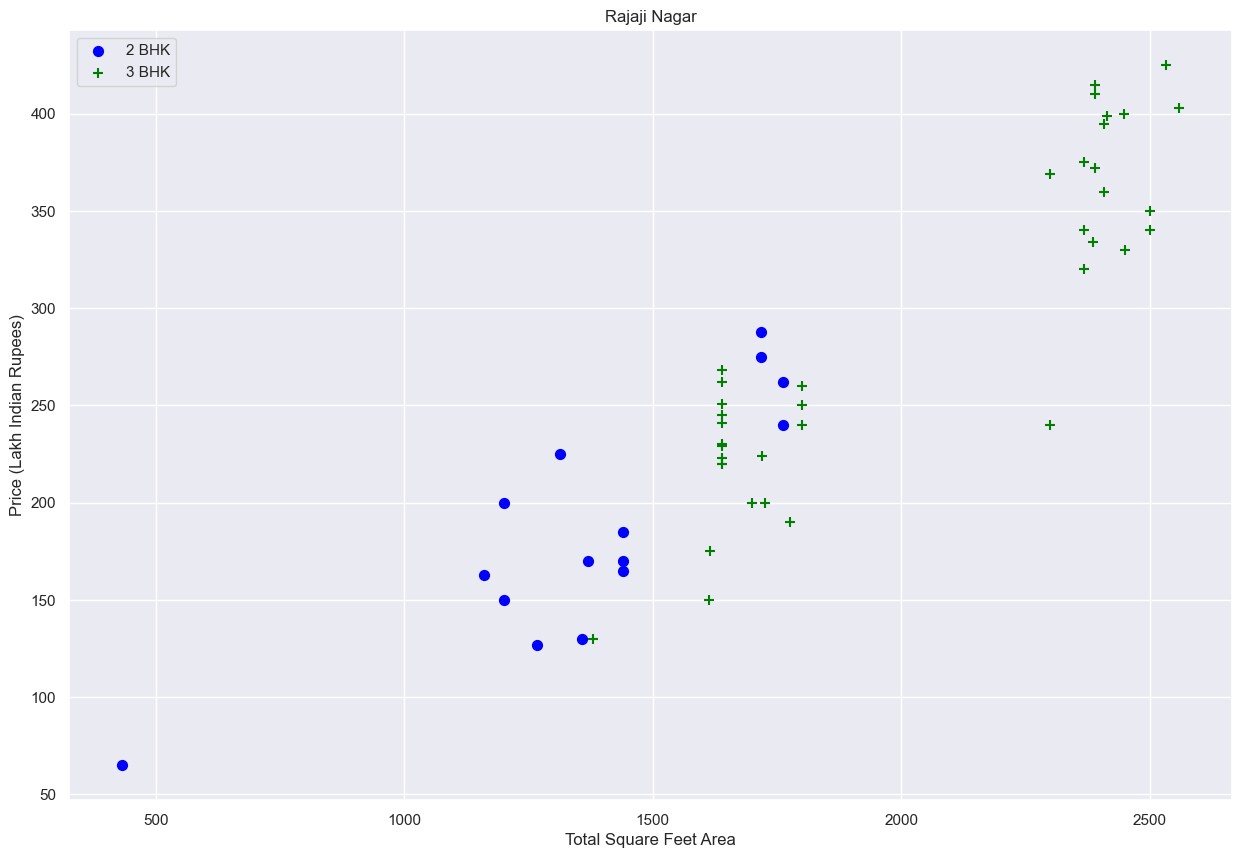

In [60]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

In the above scatterplot we observe that at same location price of 2 BHK house is greater than 3 BHK so it is outlier

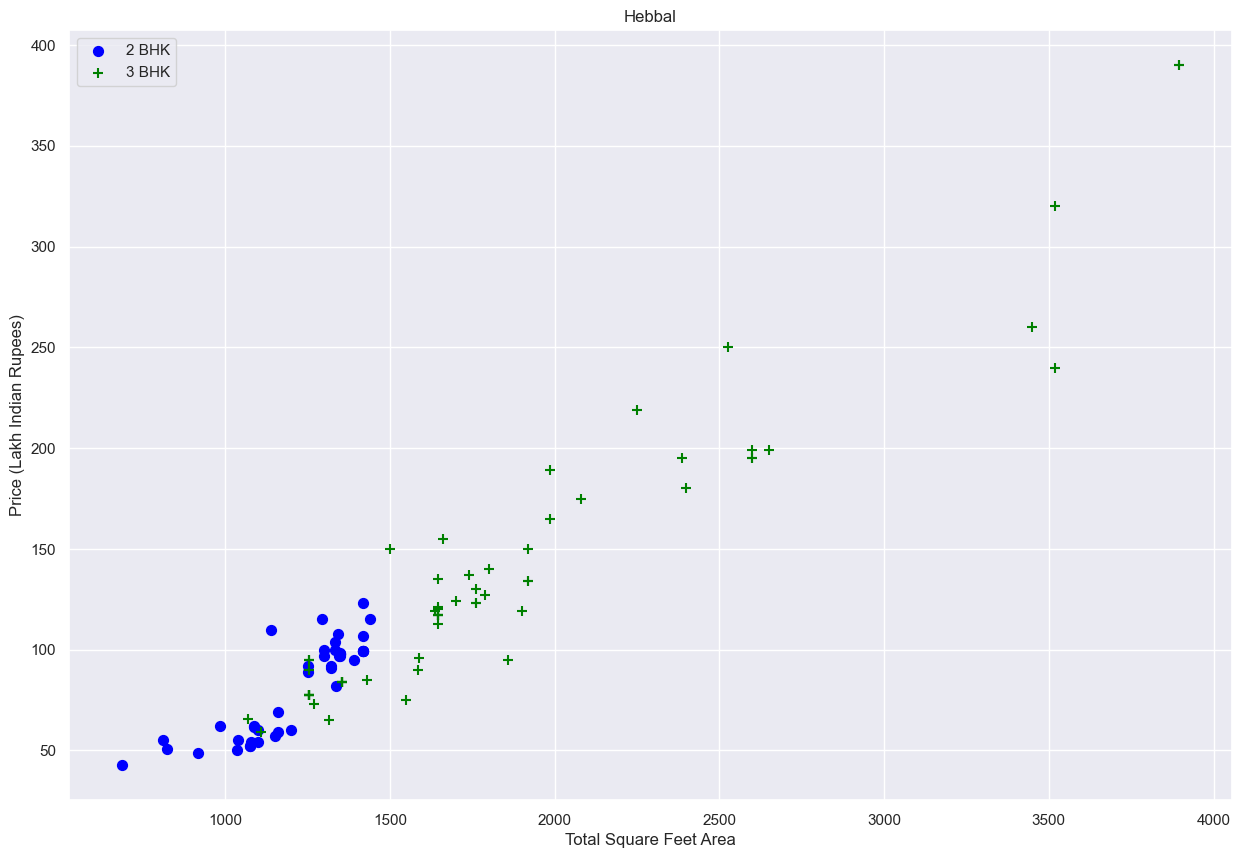

In [62]:
plot_scatter_chart(df6,"Hebbal")

In the above scatterplot we observe that at same location price of 3 BHK house is less than 2 BHK so it is outlier

Text(0, 0.5, 'Count')

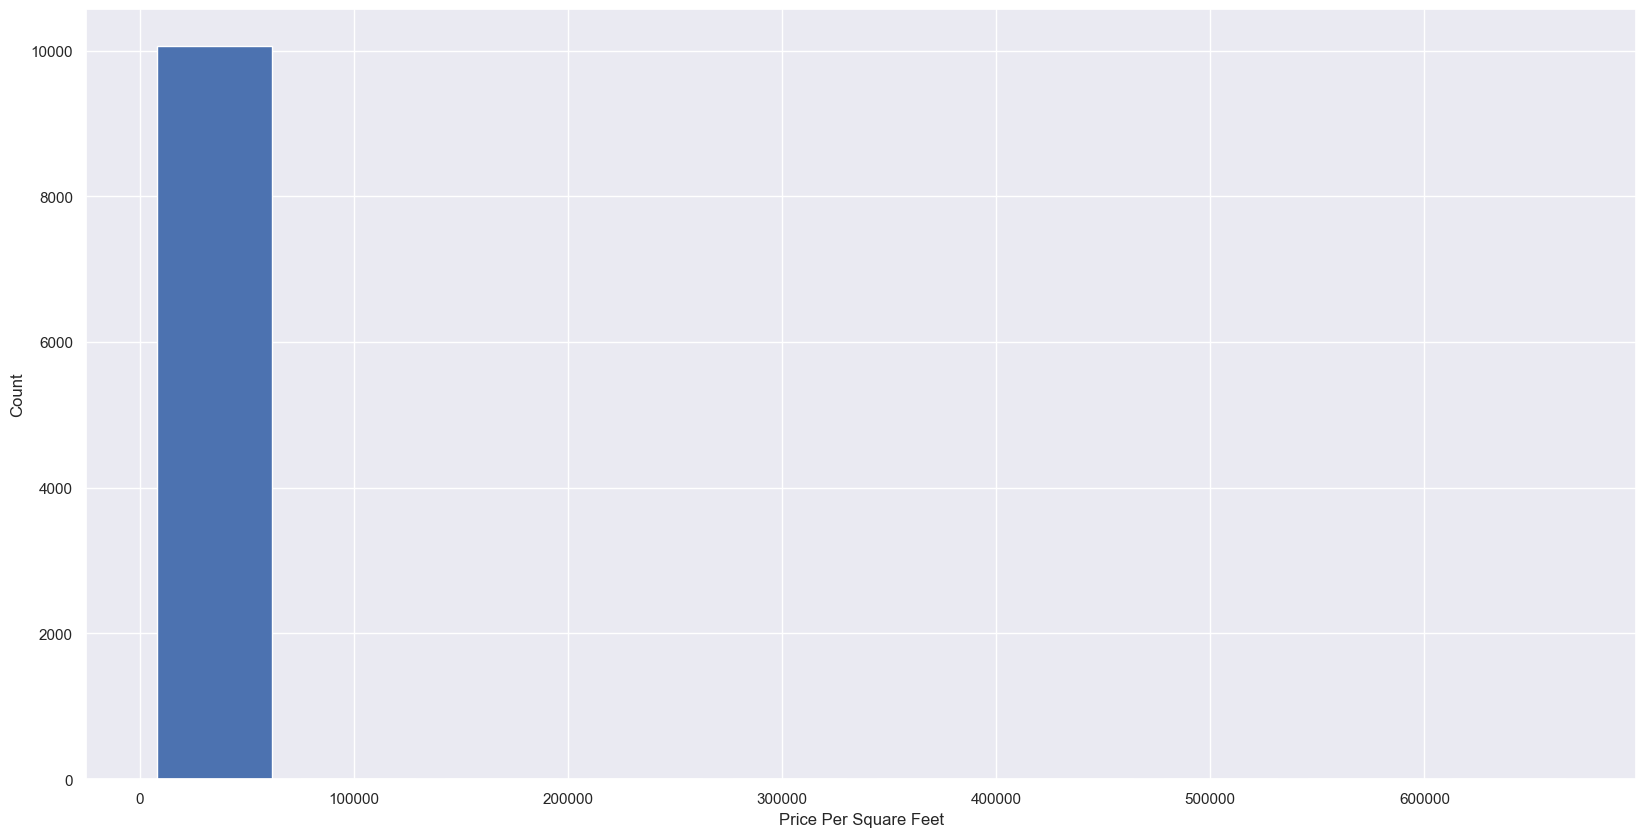

In [63]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Removing BHK outliers

In [64]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
 
df7 = remove_bhk_outliers(df6)
df7.shape

(8168, 7)

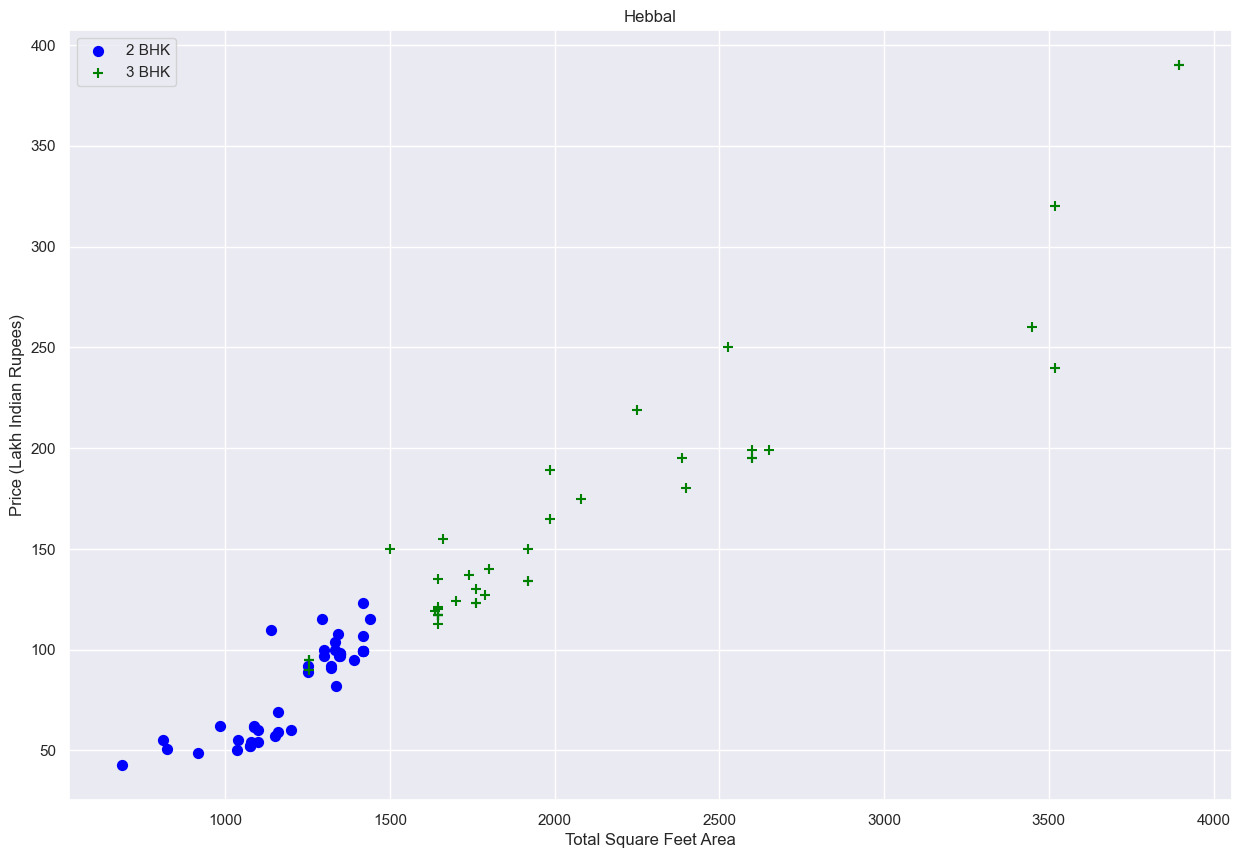

In [65]:
plot_scatter_chart(df7,"Hebbal")

Most of the blue data points got removed from the green data points 

Outlier Removal using Bathrooms Feature

In [66]:
df6.bath.unique()

array([ 3.,  2.,  1.,  4.,  7.,  6.,  5.,  8.,  9., 14., 10., 12.])

Text(0, 0.5, 'Count')

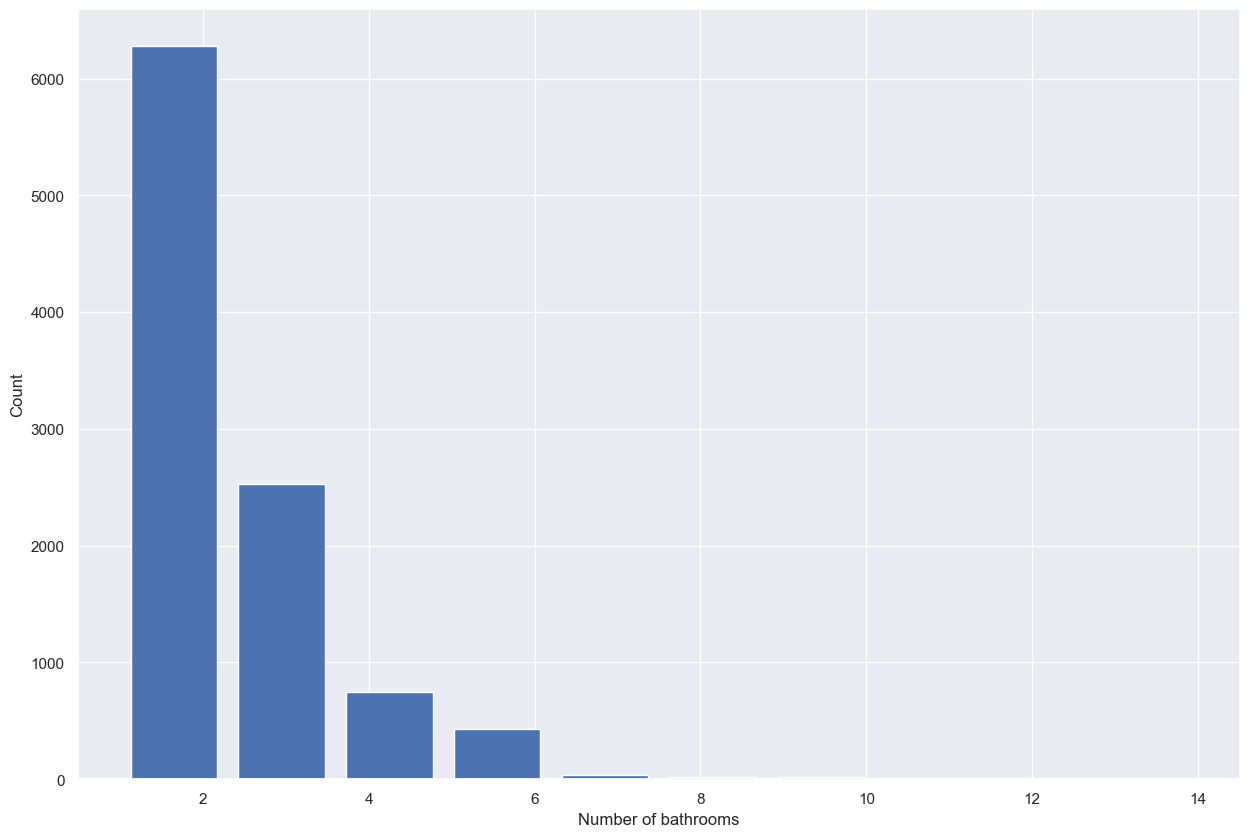

In [67]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [68]:
df6[df6.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
862,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
6674,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9737,Wilson Garden,8 Bedroom,1850.0,12.0,300.0,8,16216.216216


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [69]:
df6[df6.bath>df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
862,BTM 1st Stage,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
1985,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.333333
2150,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
6603,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
8054,Sathya Sai Layout,6 BHK,11338.0,9.0,1000.0,6,8819.897689
8575,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
9737,Wilson Garden,8 Bedroom,1850.0,12.0,300.0,8,16216.216216


In [70]:
df7 = df6[df6.bath<df6.bhk+2]
df7.shape

(9961, 7)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 'balcony'

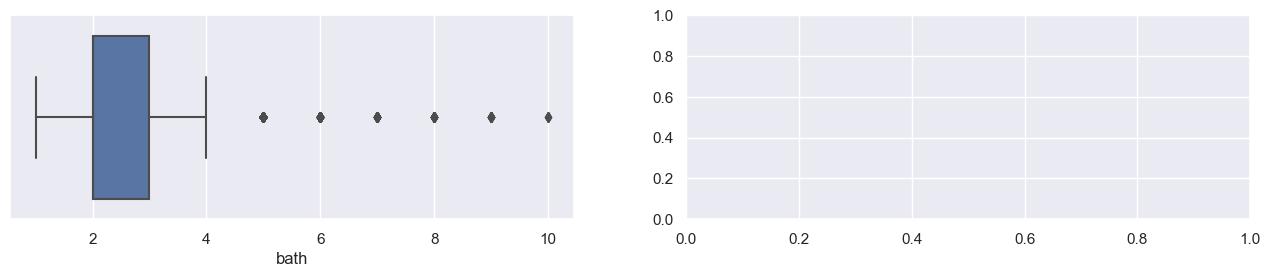

In [71]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df7[var])

In [72]:
df8 = df7.drop(['size','price_per_sqft'],axis='columns')
df8.head(3)

,location,total_sqft,bath,price,bhk
0,Devarabeesana Halli,1672.0,3.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,150.0,3


In [74]:
df9 = df8.drop(["location","total_sqft"], axis =1)
df9.head()

,bath,price,bhk
0,3.0,150.0,3
1,3.0,149.0,3
2,3.0,150.0,3
3,2.0,44.0,3
4,2.0,40.0,2


# Use One Hot Encoding for Location 

In [75]:
dummies = pd.get_dummies(df8.location)
dummies.head(3)

,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Block Koramangala,2nd Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Arekere Mico Layout,2nd Stage Nagarbhavi,3rd Block Banashankari,3rd Block Hrbr Layout,3rd Block Jayanagar,3rd Block Koramangala,3rd Phase JP Nagar,4th Block Jayanagar,4th Block Koramangala,4th Phase JP Nagar,4th T block Jayanagar,5th Block Hbr Layout,5th Block Jayanagar,5th Phase JP Nagar,5th Stage BEML Layout,6th Phase JP Nagar,6th block Koramangala,7th Block Jayanagar,7th Phase JP Nagar,8th Block Jayanagar,8th Phase JP Nagar,8th block Koramangala,9th Block Jayanagar,9th Phase JP Nagar,A Narayanapura,AECS Layout,AGS Layout,AMS Layout,Abbaiah Reddy Layout,Abbigere,Adityanagar,Agrahara Dasarahalli,Aishwarya Crystal Layout,Akshaya Nagar,Akshaya Vana,Akshayanagara East,Akshya Nagar,Alfa Garden Layout,Alur,Amarjyothi Colony,Ambalipura,Ambedkar Colony,Ambedkar Nagar,Amblipura,Amruthahalli,Amruthnagar,Anand Nagar,Anand nagar,Anandapura,Anantapura,Ananth Nagar,Andrahalli,Anekal,Anjana Nagar,Anjanapura,Anjappa Layout,Ankappa Layout,Annaiah Reddy Layout,Annapurneshwari Nagar,Anugrah Layout,Anwar Layout,Ardendale,Arehalli,Arekere,Arishinakunte,Ashirvad Colony,Ashok Nagar,Ashwath Nagar,Ashwathnagar,Ashwini layout,Atmananda Colony,Attibele,Attur Layout,Austin Town,Avalahalli,Ayappa Nagar,B Channasandra,B Narayanapura,BCC Layout,BCMC Layout,BEL Road,BEML Layout,BHEL Layout,BSM Extension,BTM 1st Stage,BTM 2nd Stage,BTM 4th Stage,BTM Layout,Baba Nagar,Babusapalaya,Badavala Nagar,Bagalakunte,Bagalur,Bagalur Main Road,Balagere,Balaji Gardens Layout,Banagiri Nagar,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bank Of Baroda Colony,Bannerghatta,Bannerghatta Road,Basapura,Basava Nagar,Basavanagara,Basavanapura,Basavangudi,Basavanna Nagar,Basaveshwara Nagar,Basaveshwara Nagar Yelahanka,Battarahalli,Begur,Begur Road,Belathur,Belatur,Bellandur,Bellari Road,Bendiganahalli,Benson Town,Bethel Nagar,Bettahalsoor,Bhagyalakshmi Avenue,Bharathi Nagar,Bhoganhalli,Bhoopsandra,Bhuvaneshwari Nagar,Bhuvaneswari Nagar,Bidadi,Bidrahalli,Bikasipura,Bileshivale,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brindavan Layout,Brindavan Nagar,Brooke Bond First Cross,Brookefield,Budigere,Byadarahalli,Byagadadhenahalli,Byatarayanapura,Byrasandra,Byrathi Village,CQAL Layout,CV Raman Nagar,Cambridge Layout,Canara Bank Colony,Canara Bank Layout,Carmelaram,Celebrity Paradise Layout,Challaghatta,Chamrajpet,Chamundi Nagar,Chandapura,Chandra Layout,Channasandra,Channasandra Layout,Chelekare,Chennammana Kere,Chennammanakere Achukattu,Chennappa Layout,Chikka Banaswadi,Chikka Tirupathi,Chikkabanavar,Chikkadunnasandra,Chikkakannalli,Chikkalasandra,Chikkasandra,Chikkathoguru,Chikku Lakshmaiah Layout,Chinnapanahalli,Chokkanahalli,Cholanayakanahalli,Choodasandra,Church Street,Classic Paradise Layout,Cleveland Town,Coconut Garden,Coconut Grove Layout,Coffee Board Layout,Cooke Town,Cottonpet,Cox Town,Crimson Layout,Cunningham Road,D Group Employees Layout,Daadys Gaarden Layout,Dairy Circle,Dasanapura,Dasappa Layout,Dasarahalli,Defence Colony,Dena Bank Colony,Devanahalli,Devanahalli Int. Airport,Devanahalli Road,Devara Jeevanahalli,Devarachikkanahalli,Devasandra Extension,Devasthanagalu,Devi Nagar,Dinnur,Divya Unnathi Layout,Doctors Layout,Dodda Banaswadi,Dodda Kempaiah Layout,Dodda Nekkundi,Dodda Nekkundi Extension,Doddaballapur,Doddabanahalli,Doddabidrakallu,Doddabommasandra,Doddagubbi,Doddakallasandra,Doddakammanahalli,Doddakannelli,Doddanakundi Industrial Area 2,Doddanekundi,Doddathoguru,Dodsworth Layout,Dollars Colony,Dollars Layout,Domlur,Domlur Layout,Dommasandra,Doopanahalli,Doorav

In [77]:
df9 = pd.concat([df8,dummies],axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Block Koramangala,2nd Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Arekere Mico Layout,2nd Stage Nagarbhavi,3rd Block Banashankari,3rd Block Hrbr Layout,3rd Block Jayanagar,3rd Block Koramangala,3rd Phase JP Nagar,4th Block Jayanagar,4th Block Koramangala,4th Phase JP Nagar,4th T block Jayanagar,5th Block Hbr Layout,5th Block Jayanagar,5th Phase JP Nagar,5th Stage BEML Layout,6th Phase JP Nagar,6th block Koramangala,7th Block Jayanagar,7th Phase JP Nagar,8th Block Jayanagar,8th Phase JP Nagar,8th block Koramangala,9th Block Jayanagar,9th Phase JP Nagar,A Narayanapura,AECS Layout,AGS Layout,AMS Layout,Abbaiah Reddy Layout,Abbigere,Adityanagar,Agrahara Dasarahalli,Aishwarya Crystal Layout,Akshaya Nagar,Akshaya Vana,Akshayanagara East,Akshya Nagar,Alfa Garden Layout,Alur,Amarjyothi Colony,Ambalipura,Ambedkar Colony,Ambedkar Nagar,Amblipura,Amruthahalli,Amruthnagar,Anand Nagar,Anand nagar,Anandapura,Anantapura,Ananth Nagar,Andrahalli,Anekal,Anjana Nagar,Anjanapura,Anjappa Layout,Ankappa Layout,Annaiah Reddy Layout,Annapurneshwari Nagar,Anugrah Layout,Anwar Layout,Ardendale,Arehalli,Arekere,Arishinakunte,Ashirvad Colony,Ashok Nagar,Ashwath Nagar,Ashwathnagar,Ashwini layout,Atmananda Colony,Attibele,Attur Layout,Austin Town,Avalahalli,Ayappa Nagar,B Channasandra,B Narayanapura,BCC Layout,BCMC Layout,BEL Road,BEML Layout,BHEL Layout,BSM Extension,BTM 1st Stage,BTM 2nd Stage,BTM 4th Stage,BTM Layout,Baba Nagar,Babusapalaya,Badavala Nagar,Bagalakunte,Bagalur,Bagalur Main Road,Balagere,Balaji Gardens Layout,Banagiri Nagar,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bank Of Baroda Colony,Bannerghatta,Bannerghatta Road,Basapura,Basava Nagar,Basavanagara,Basavanapura,Basavangudi,Basavanna Nagar,Basaveshwara Nagar,Basaveshwara Nagar Yelahanka,Battarahalli,Begur,Begur Road,Belathur,Belatur,Bellandur,Bellari Road,Bendiganahalli,Benson Town,Bethel Nagar,Bettahalsoor,Bhagyalakshmi Avenue,Bharathi Nagar,Bhoganhalli,Bhoopsandra,Bhuvaneshwari Nagar,Bhuvaneswari Nagar,Bidadi,Bidrahalli,Bikasipura,Bileshivale,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brindavan Layout,Brindavan Nagar,Brooke Bond First Cross,Brookefield,Budigere,Byadarahalli,Byagadadhenahalli,Byatarayanapura,Byrasandra,Byrathi Village,CQAL Layout,CV Raman Nagar,Cambridge Layout,Canara Bank Colony,Canara Bank Layout,Carmelaram,Celebrity Paradise Layout,Challaghatta,Chamrajpet,Chamundi Nagar,Chandapura,Chandra Layout,Channasandra,Channasandra Layout,Chelekare,Chennammana Kere,Chennammanakere Achukattu,Chennappa Layout,Chikka Banaswadi,Chikka Tirupathi,Chikkabanavar,Chikkadunnasandra,Chikkakannalli,Chikkalasandra,Chikkasandra,Chikkathoguru,Chikku Lakshmaiah Layout,Chinnapanahalli,Chokkanahalli,Cholanayakanahalli,Choodasandra,Church Street,Classic Paradise Layout,Cleveland Town,Coconut Garden,Coconut Grove Layout,Coffee Board Layout,Cooke Town,Cottonpet,Cox Town,Crimson Layout,Cunningham Road,D Group Employees Layout,Daadys Gaarden Layout,Dairy Circle,Dasanapura,Dasappa Layout,Dasarahalli,Defence Colony,Dena Bank Colony,Devanahalli,Devanahalli Int. Airport,Devanahalli Road,Devara Jeevanahalli,Devarachikkanahalli,Devasandra Extension,Devasthanagalu,Devi Nagar,Dinnur,Divya Unnathi Layout,Doctors Layout,Dodda Banaswadi,Dodda Kempaiah Layout,Dodda Nekkundi,Dodda Nekkundi Extension,Doddaballapur,Doddabanahalli,Doddabidrakallu,Doddabommasandra,Doddagubbi,Doddakallasandra,Doddakammanahalli,Doddakannelli,Doddanakundi Industrial Area 2,Doddanekundi,Doddathoguru,Dodsworth Layout,Dollars Colony,Dollars Layout,Domlur,Domlur Lay

In [81]:
df10 = df9.drop(['location'],axis='columns')
df10.head()

,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,1st Stage Indira Nagar,2nd Block Hrbr Layout,2nd Block Jayanagar,2nd Block Koramangala,2nd Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Arekere Mico Layout,2nd Stage Nagarbhavi,3rd Block Banashankari,3rd Block Hrbr Layout,3rd Block Jayanagar,3rd Block Koramangala,3rd Phase JP Nagar,4th Block Jayanagar,4th Block Koramangala,4th Phase JP Nagar,4th T block Jayanagar,5th Block Hbr Layout,5th Block Jayanagar,5th Phase JP Nagar,5th Stage BEML Layout,6th Phase JP Nagar,6th block Koramangala,7th Block Jayanagar,7th Phase JP Nagar,8th Block Jayanagar,8th Phase JP Nagar,8th block Koramangala,9th Block Jayanagar,9th Phase JP Nagar,A Narayanapura,AECS Layout,AGS Layout,AMS Layout,Abbaiah Reddy Layout,Abbigere,Adityanagar,Agrahara Dasarahalli,Aishwarya Crystal Layout,Akshaya Nagar,Akshaya Vana,Akshayanagara East,Akshya Nagar,Alfa Garden Layout,Alur,Amarjyothi Colony,Ambalipura,Ambedkar Colony,Ambedkar Nagar,Amblipura,Amruthahalli,Amruthnagar,Anand Nagar,Anand nagar,Anandapura,Anantapura,Ananth Nagar,Andrahalli,Anekal,Anjana Nagar,Anjanapura,Anjappa Layout,Ankappa Layout,Annaiah Reddy Layout,Annapurneshwari Nagar,Anugrah Layout,Anwar Layout,Ardendale,Arehalli,Arekere,Arishinakunte,Ashirvad Colony,Ashok Nagar,Ashwath Nagar,Ashwathnagar,Ashwini layout,Atmananda Colony,Attibele,Attur Layout,Austin Town,Avalahalli,Ayappa Nagar,B Channasandra,B Narayanapura,BCC Layout,BCMC Layout,BEL Road,BEML Layout,BHEL Layout,BSM Extension,BTM 1st Stage,BTM 2nd Stage,BTM 4th Stage,BTM Layout,Baba Nagar,Babusapalaya,Badavala Nagar,Bagalakunte,Bagalur,Bagalur Main Road,Balagere,Balaji Gardens Layout,Banagiri Nagar,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bank Of Baroda Colony,Bannerghatta,Bannerghatta Road,Basapura,Basava Nagar,Basavanagara,Basavanapura,Basavangudi,Basavanna Nagar,Basaveshwara Nagar,Basaveshwara Nagar Yelahanka,Battarahalli,Begur,Begur Road,Belathur,Belatur,Bellandur,Bellari Road,Bendiganahalli,Benson Town,Bethel Nagar,Bettahalsoor,Bhagyalakshmi Avenue,Bharathi Nagar,Bhoganhalli,Bhoopsandra,Bhuvaneshwari Nagar,Bhuvaneswari Nagar,Bidadi,Bidrahalli,Bikasipura,Bileshivale,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brindavan Layout,Brindavan Nagar,Brooke Bond First Cross,Brookefield,Budigere,Byadarahalli,Byagadadhenahalli,Byatarayanapura,Byrasandra,Byrathi Village,CQAL Layout,CV Raman Nagar,Cambridge Layout,Canara Bank Colony,Canara Bank Layout,Carmelaram,Celebrity Paradise Layout,Challaghatta,Chamrajpet,Chamundi Nagar,Chandapura,Chandra Layout,Channasandra,Channasandra Layout,Chelekare,Chennammana Kere,Chennammanakere Achukattu,Chennappa Layout,Chikka Banaswadi,Chikka Tirupathi,Chikkabanavar,Chikkadunnasandra,Chikkakannalli,Chikkalasandra,Chikkasandra,Chikkathoguru,Chikku Lakshmaiah Layout,Chinnapanahalli,Chokkanahalli,Cholanayakanahalli,Choodasandra,Church Street,Classic Paradise Layout,Cleveland Town,Coconut Garden,Coconut Grove Layout,Coffee Board Layout,Cooke Town,Cottonpet,Cox Town,Crimson Layout,Cunningham Road,D Group Employees Layout,Daadys Gaarden Layout,Dairy Circle,Dasanapura,Dasappa Layout,Dasarahalli,Defence Colony,Dena Bank Colony,Devanahalli,Devanahalli Int. Airport,Devanahalli Road,Devara Jeevanahalli,Devarachikkanahalli,Devasandra Extension,Devasthanagalu,Devi Nagar,Dinnur,Divya Unnathi Layout,Doctors Layout,Dodda Banaswadi,Dodda Kempaiah Layout,Dodda Nekkundi,Dodda Nekkundi Extension,Doddaballapur,Doddabanahalli,Doddabidrakallu,Doddabommasandra,Doddagubbi,Doddakallasandra,Doddakammanahalli,Doddakannelli,Doddanakundi Industrial Area 2,Doddanekundi,Doddathoguru,Dodsworth Layout,Dollars Colony,Dollars Layout,Domlur,Domlur Layout,Domma

# Building the Model Now...

In [82]:
X = df10.drop(['price'],axis='columns')
y = df10.price

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7851354101950372

Using K Fold Cross Validation to measure accuracy of LinearRegression Model 

In [89]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 7.85135410e-01, -1.98675090e+14,  7.13713892e-01, -4.75732151e+13,
       -1.65114806e+14])

We can see that in 5 Iterations, we get a score above 75% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score.

# Finding Best model using GridSearchCV

GridSearch CV tests all the parameters and gives the best model...

In [102]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,-7.903557e+16,{'normalize': False}
1,lasso,6.274809e-01,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,6.526613e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [107]:
pred=lr.predict(X_test)
lr.predict(X_test)

array([53.46956086, 66.79563461, 36.25573248, ..., 95.        ,
       60.22924344, 40.94911724])

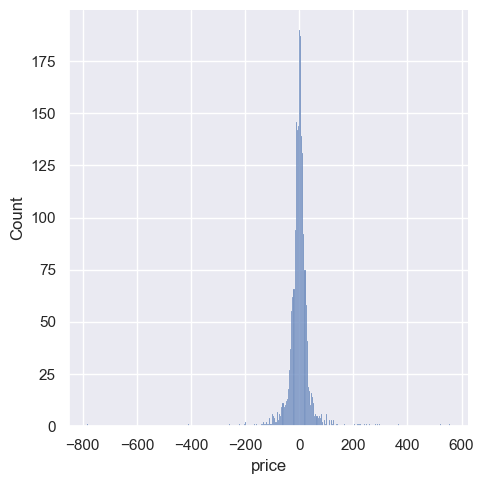

In [108]:
import seaborn as sns
sns.displot(y_test-pred)

 Based on the above results we can say that LinearRegression gives us the best score. Hence we will use that.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


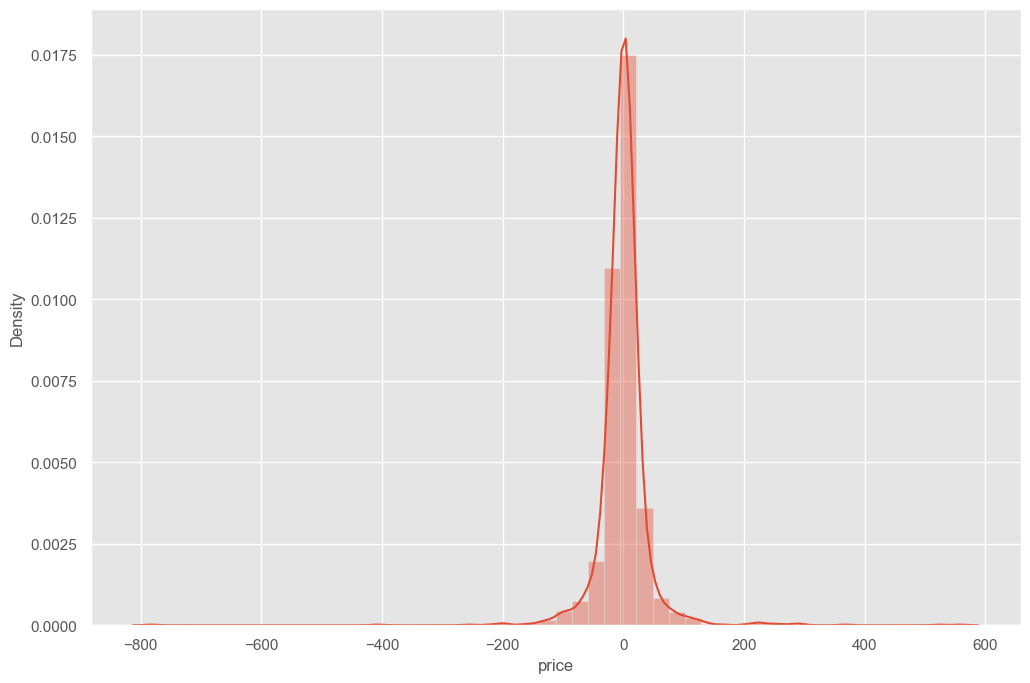

In [109]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-pred)
plt.show()

In [110]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 22.919340090309966
MSE: 2118.9491915893814
RMSE: 46.03204526837126


In [111]:
from sklearn.metrics import r2_score
print('R2:', metrics.r2_score(y_test, pred))

R2: 0.7851354101950372


Thus the data is well fiited through LinearRegression with an accuracy of 78.5% i.e, our model can explain aprrox 78.5% variation in the data.